<a href="https://colab.research.google.com/github/Ravihara2000/Cats-Dogs-Identifier/blob/main/Cats_Dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import opendatasets as od


In [8]:
#download data set
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Skipping, found downloaded files in "./cats-and-dogs-for-classification" (use force=True to force download)


In [9]:
BATCH_SIZE =32
IMAGE_SIZE = (128,128)

In [10]:
train_data_dir ="/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir ="/content/cats-and-dogs-for-classification/cats_dogs/test"

In [11]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         )

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [12]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [13]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


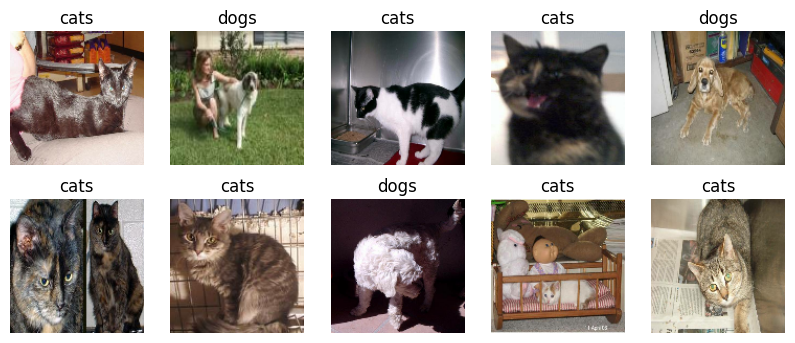

In [14]:
#plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [15]:
#display how image looks like
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [16]:
#bring all the images values between 0-1 by dividing 255(Normalized pixel values)
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [17]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [18]:
#data augmentation
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal", input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

In [19]:
model = tf. keras.models.Sequential ()
model. add (data_augmentation)
model.add(tf.keras. layers.Conv2D(32, kernel_size=3, activation='relu'))
model. add(tf. keras. layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation= 'relu'))
model.add (tf.keras. layers. MaxPooling2D())

model.add(tf.keras. layers. Conv2D(128, kernel_size=3, activation= 'relu'))
model. add(tf. keras. layers. MaxPooling2D())

model. add(tf.keras. layers. Dropout (0.2))
model. add(tf. keras. layers. BatchNormalization ())

model. add(tf.keras.layers. Flatten ())

model. add(tf.keras.layers. Dense (128, activation= 'relu'))
model. add(tf.keras.layers. Dense (128, activation= 'relu'))
model. add(tf.keras.layers. Dense (32, activation='relu'))

model. add(tf.keras.layers. Dense (1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [21]:
#compiled model architecture
model.compile(optimizer=tf.keras.optimizers.Adam(),
loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [22]:
start_time = time.time ()
history = model.fit(train_data,
epochs=20,
validation_data=validation_data)

end_time=time.time()

Epoch 1/20
225/225 [==============================] - 24s 47ms/step - loss: 0.6723 - accuracy: 0.5957 - val_loss: 0.6770 - val_accuracy: 0.5300
Epoch 2/20
225/225 [==============================] - 11s 50ms/step - loss: 0.6444 - accuracy: 0.6264 - val_loss: 0.6911 - val_accuracy: 0.5450
Epoch 3/20
225/225 [==============================] - 10s 42ms/step - loss: 0.6301 - accuracy: 0.6393 - val_loss: 0.6590 - val_accuracy: 0.6513
Epoch 4/20
225/225 [==============================] - 10s 41ms/step - loss: 0.6063 - accuracy: 0.6656 - val_loss: 1.0554 - val_accuracy: 0.5562
Epoch 5/20
225/225 [==============================] - 11s 48ms/step - loss: 0.5945 - accuracy: 0.6817 - val_loss: 0.6808 - val_accuracy: 0.6562
Epoch 6/20
225/225 [==============================] - 10s 45ms/step - loss: 0.6002 - accuracy: 0.6710 - val_loss: 0.7149 - val_accuracy: 0.6100
Epoch 7/20
225/225 [==============================] - 11s 48ms/step - loss: 0.5923 - accuracy: 0.6854 - val_loss: 0.9736 - val_accuracy:

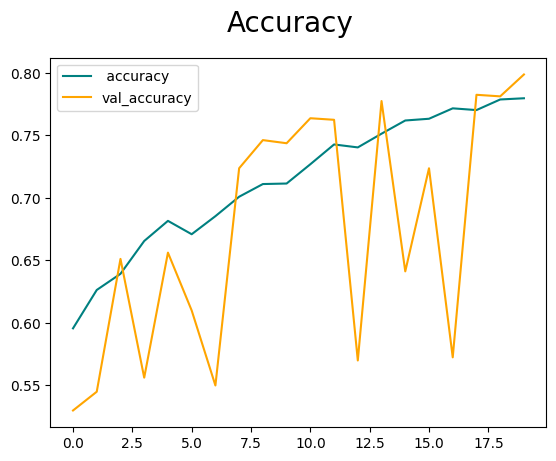

In [23]:
fig = plt.figure()
plt.plot (history. history['accuracy'], color='teal',label=" accuracy")
plt.plot (history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt. legend()
plt.show()

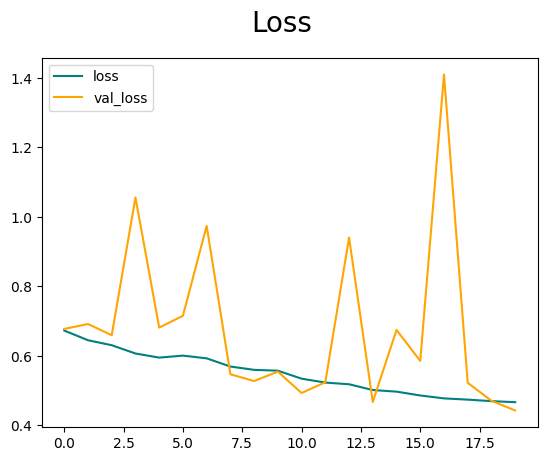

In [24]:
fig = plt.figure()
plt.plot (history. history['loss'], color='teal',label="loss")
plt.plot (history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt. legend()
plt.show()

In [25]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [28]:
for batch in test_data.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  precision.update_state (y, yhat)
  recall.update_state (y, yhat)
  accuracy. update_state(y,yhat)

1/1 [==============================] - 0s 226ms/step


In [30]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.73866445>

In [31]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.896>

In [32]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7895>

In [33]:
!pip install opencv-python

In [34]:
import cv2

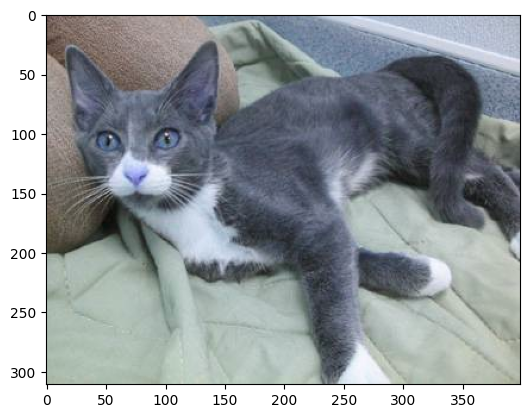

In [52]:
image = cv2.imread("/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4021.jpg")
plt.imshow(image)
plt.show()

In [53]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

In [54]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.44909698, 0.36674404, 0.3589009 ],
        [0.51060367, 0.42825073, 0.4204076 ],
        [0.44909495, 0.366742  , 0.35889888],
        ...,
        [0.72886866, 0.7641628 , 0.81906474],
        [0.68973136, 0.7250255 , 0.77992743],
        [0.6522365 , 0.68753064, 0.7424326 ]],

       [[0.4409983 , 0.35921213, 0.34966862],
        [0.38670853, 0.30492237, 0.29537886],
        [0.50930876, 0.4275226 , 0.4179791 ],
        ...,
        [0.6706232 , 0.7059173 , 0.76081926],
        [0.6622243 , 0.6975184 , 0.75242037],
        [0.65623724, 0.69153136, 0.7464333 ]],

       [[0.3790766 , 0.30289707, 0.27878556],
        [0.5286948 , 0.45251524, 0.42840374],
        [0.5165084 , 0.44032887, 0.41621733],
        ...,
        [0.68045956, 0.7157537 , 0.77065563],
        [0.6793094 , 0.71460354, 0.7695055 ],
        [0.6869732 , 0.7222674 , 0.77716935]],

       ...,

       [[0.6644489 , 0.721789  , 0.656924  ],
        [0.66

In [55]:
np.expand_dims(scaled_image,0).shape

(1, 128, 128, 3)

In [56]:
y_hat = model.predict(np.expand_dims(scaled_image,0))

1/1 [==============================] - 0s 20ms/step


In [57]:
y_hat

array([[0.8706037]], dtype=float32)

In [58]:
if y_hat >= 0.5:
  print(class_names[1])
else:
  print(class_names[0])

dogs
